In [67]:
import numpy as np
import pandas as pd
import math
import cv2
import argparse
import imutils
import os

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.colors as colors
import matplotlib.image as mpimg

from sklearn import decomposition
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors



from skimage import data, io, filters,measure
from skimage.feature import match_template 

import scipy
from scipy.ndimage.interpolation import shift
from scipy import ndimage,spatial
from scipy.optimize import leastsq, minimize
import scipy.ndimage.filters as filters



from IPython.display import display, HTML
from PIL import Image
import PIL.ImageOps 
from imutils import contours
from  flutype_analysis import image2numeric, utils, analysis

import re

In [69]:
data_ids = {'N10'}
#--------------------------
#data_id = 'E5'
#data_id = 'N10'
data_id = 'X31'
directory = "/home/janekg89/Backup/170524_Spotting/170509_Spotting/170512_Again/170519_after_Virus"
gal_pep = pd.read_csv("../data/N00010/N00010_pep.gal", sep='\t', index_col="ID")               
gal_vir = pd.read_csv("../data/N00010/N00010_vir.gal", sep='\t', index_col="ID")     
meta = pd.read_csv("../data/N00010/N00010.meta", sep='\t')               

meta
if any(data_id == d_id for d_id in ['N10', 'E5' ,'X31']):
    #load raw data
    #pep= pd.read_csv("data/{}_pep.gal".format(data_id), sep='\t',index_col="ID")
    for fname in os.listdir(directory):    # change directory as needed
        if os.path.isfile(directory+'/{}'.format(fname)):# make sure it's a file, not a directory entry
            #print(fname)
            if "600_100_635.tif".format(data_id) in fname:    # search for string
                
                
                r = re.compile('(.*?)_600')
                m = r.search(fname)
                if m:
                    folder = m.group(1)
                print(folder)
                print(fname)

                imafter = Image.open(directory+'/{}'.format(fname))
                imafter.seek(2)
                flutype_analysis.utils.assure_path_exists("../data/"+folder+"/")
                imafter.save("../data/"+folder+"/"+fname, "tiff")
                gal_pep.to_csv("../data/"+folder+"/{}_pep.gal".format(folder),sep='\t')
                gal_vir.to_csv("../data/"+folder+"/{}_vir.gal".format(folder),sep='\t')
                meta.to_csv("../data/"+folder+"/{}.meta".format(folder),index=False,sep='\t')

2017-05-19_N11_Cal
2017-05-19_N11_Cal_600_100_635.tif
2017-05-19_N5_X31
2017-05-19_N5_X31_600_100_635.tif
2017-05-19_N6_Pan
2017-05-19_N6_Pan_600_100_635.tif
2017-05-19_N7_Cal
2017-05-19_N7_Cal_600_100_635.tif
2017-05-19_N10_Pan
2017-05-19_N10_Pan_600_100_635.tif
2017-05-19_E6_untenliegend_X31
2017-05-19_E6_untenliegend_X31_600_100_635.tif
2017-05-19_N9_X31
2017-05-19_N9_X31_600_100_635.tif
2017-05-19_E5_X31
2017-05-19_E5_X31_600_100_635.tif


4


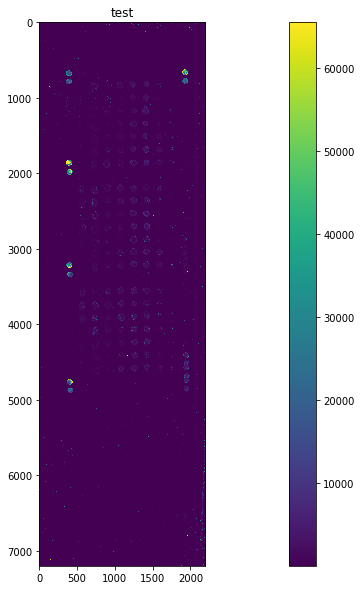

In [48]:
print(imafter.n_frames)
imafter.seek(2)
flutype_analysis.image2numeric.draw_imag(imafter,"test")